In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
def modify_file(file_name):
    file = open(file_name, "r")
    #remove.txt
    new_file_name = file_name.replace(".txt", "_new.txt")
    new_file = open(new_file_name, "w")
    for line in file:
        line = line.strip()
        if line.count('=') == 1:
            line = line + " " + file.readline().strip()
        new_file.write(line + "\n")
    file.close()
    new_file.close()
    

In [3]:
modify_file("min_output_3_neg.txt")
modify_file("min_output_3_pos.txt")

In [4]:

#calculate minimum value of list and compare it value after 2 nd equal sign
def generate_true_predicted_min(file_name):
    file=open(file_name,"r")

    true=[]
    predicted=[]

    for line in file:
        line = line.strip()
        
        #find pattern [1,2,3]
        m = re.search(r'\[([^]]+)\]', line)
        
        if m:
            
            list_m = m.group(1).split(',')
            
            #find minimum value
            min = int(list_m[0].strip())
            for i in list_m:
                
                if int(i.strip()) < min:
                    min = int(i.strip())
            

            #find value after 2nd equal sign
            m = re.search(r'=(.*)', line)
            m = re.search(r'=(.*)', m.group(1))

            #strip space
            value = m.group(1).strip()

            

            #append true and predicted value
            true.append(min)
            predicted.append(int(value))
            
    file.close()
    return true, predicted

#generate true and predicted values
true_neg, predicted_neg = generate_true_predicted_min("min_output_3_neg_new.txt")
true_pos, predicted_pos = generate_true_predicted_min("min_output_3_pos_new.txt")

        
        
            

In [5]:
print(true_pos)
print(predicted_pos)

[0, 0, 3, 2, 4, 4, 1, 1, 3, 3, 3, 2, 1, 4, 2, 2, 0, 2, 3, 1, 0, 3, 1, 0, 2, 0, 0, 2, 0, 1, 0, 3, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 3, 5, 0, 1, 3, 4, 2, 6, 1, 0, 3, 2, 7, 2, 1, 2, 6, 0, 3, 2, 1, 5, 0, 2, 2, 4, 1, 0, 2, 1, 0, 4, 3, 3, 5, 1, 1, 2, 0, 1, 1, 3, 0, 1, 0, 1, 4, 7, 0, 2, 5, 4, 0, 7, 0, 1, 4, 2, 36, 42, 30, 48, 42, 18, 10, 62, 11, 21, 18, 10, 32, 9, 32, 37, 72, 29, 84, 4, 22, 21, 28, 1, 48, 41, 14, 17, 53, 4, 12, 11, 16, 27, 22, 2, 8, 28, 3, 9, 70, 55, 27, 12, 8, 7, 45, 13, 14, 78, 3, 18, 27, 41, 6, 34, 36, 7, 32, 48, 5, 51, 58, 10, 9, 44, 19, 59, 41, 35, 4, 49, 41, 10, 20, 6, 36, 18, 10, 87, 2, 9, 4, 23, 30, 30, 36, 6, 10, 11, 10, 17, 57, 67, 6, 2, 0, 8, 5, 30, 45, 475, 733, 42, 37, 339, 450, 376, 80, 302, 359, 281, 525, 448, 370, 379, 285, 396, 219, 75, 327, 161, 229, 26, 67, 419, 460, 186, 56, 230, 201, 95, 639, 29, 215, 296, 304, 208, 353, 108, 51, 163, 163, 402, 51, 8, 374, 75, 625, 347, 41, 152, 166, 501, 112, 27, 591, 634, 32, 155, 753, 332, 350, 270, 230, 324, 124, 353, 80,

In [6]:
#print len of true and predicted values
print(len(true_neg))
print(len(predicted_neg))
print(len(true_pos))
print(len(predicted_pos))


500
500
500
500


In [7]:
#first 100 are 1 digit and next 100 are 2 digit and so on upto 5 digit for 500 values

#calculate accuracy
    
def digit_accuracy(true, predicted):
    accuracy={str(i):0 for i in range(1,6)}
    total={str(i):0 for i in range(1,6)}

    for i in range(1,6):
        for j in range(100*(i-1),100*i):
            total[str(i)]+=1
            if true[j]==predicted[j]:
                accuracy[str(i)]+=1
            # else:
            #     print("True:", true[j], "Predicted:", predicted[j])
            #     print("Index:", j)
        accuracy[str(i)]/=total[str(i)]
        accuracy[str(i)]*=100
    
    return accuracy, total

    

In [8]:
accuracy_neg, total_neg = digit_accuracy(true_neg, predicted_neg)
accuracy_pos, total_pos = digit_accuracy(true_pos, predicted_pos)
print("Accuracy of min for list length 3")
print(accuracy_neg)
print(total_neg)
print(accuracy_pos)
print(total_pos)

Accuracy of min for list length 3
{'1': 79.0, '2': 78.0, '3': 73.0, '4': 79.0, '5': 66.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}
{'1': 99.0, '2': 91.0, '3': 98.0, '4': 96.0, '5': 89.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}


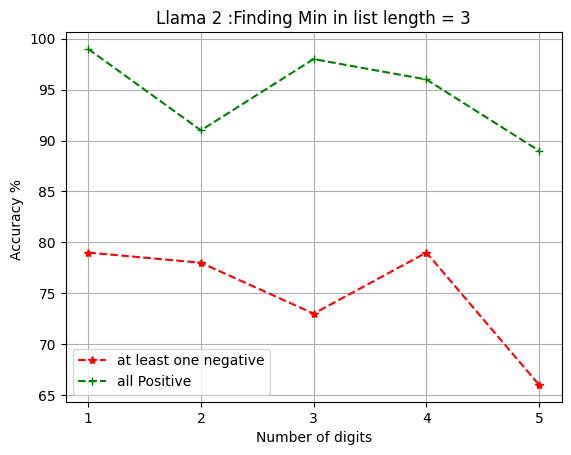

In [9]:
#plot accuracy vs number of digits on same graph

plt.plot(list(accuracy_neg.keys()), list(accuracy_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.plot(list(accuracy_pos.keys()), list(accuracy_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Accuracy % ")
plt.legend()
plt.grid()
plt.title("Llama 2 :Finding Min in list length = 3")
plt.show()


In [10]:
modify_file("min_output_5_neg.txt")
modify_file("min_output_5_pos.txt")

In [11]:
#generate true and predicted values
true_neg, predicted_neg = generate_true_predicted_min("min_output_5_neg_new.txt")
true_pos, predicted_pos = generate_true_predicted_min("min_output_5_pos_new.txt")

#print len of true and predicted values
print(len(true_neg))
print(len(predicted_neg))
print(len(true_pos))
print(len(predicted_pos))


500
500
500
500


In [12]:
print("Hard Accuracy of min for list length 5")
accuracy_neg, total_neg = digit_accuracy(true_neg, predicted_neg)
accuracy_pos, total_pos = digit_accuracy(true_pos, predicted_pos)

print(accuracy_neg)
print(total_neg)
print(accuracy_pos)
print(total_pos)

Hard Accuracy of min for list length 5
{'1': 47.0, '2': 50.0, '3': 47.0, '4': 42.0, '5': 44.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}
{'1': 84.0, '2': 94.0, '3': 89.0, '4': 86.0, '5': 81.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}


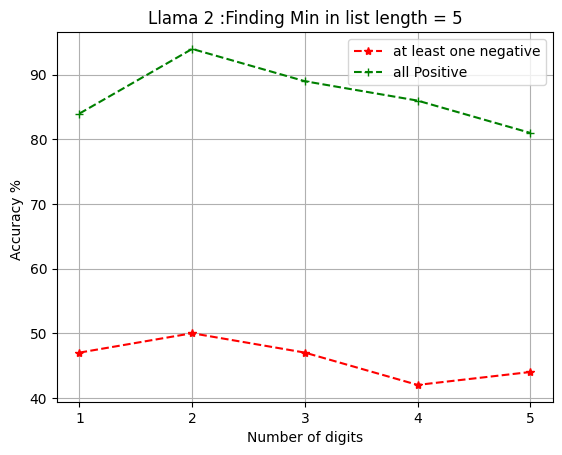

In [13]:

plt.plot(list(accuracy_neg.keys()), list(accuracy_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.plot(list(accuracy_pos.keys()), list(accuracy_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Accuracy % ")
plt.legend()
plt.grid()
plt.title("Llama 2 :Finding Min in list length = 5")
plt.show()

### Max

In [14]:
modify_file("max_output_3_neg.txt")
modify_file("max_output_3_pos.txt")

In [15]:
def generate_true_predicted_max(file_name):
    file=open(file_name,"r")

    true=[]
    predicted=[]

    for line in file:
        line = line.strip()
        
        #find pattern [1,2,3]
        m = re.search(r'\[([^]]+)\]', line)
        #print(m)
        if m:
            
            list_m = m.group(1).split(',')
            # find maximum value
            max = int(list_m[0].strip())
            for i in list_m:
                if int(i.strip()) > max:
                    max = int(i.strip())
            
            m = re.search(r'=(.*)', line)
            m = re.search(r'=(.*)', m.group(1))
            #print(m.group(1))

            #strip space
            value = m.group(1).strip()

            

            #append true and predicted value
            true.append(max)
            predicted.append(int(value))
            
    file.close()
    return true, predicted

#generate true and predicted values
true_neg, predicted_neg = generate_true_predicted_max("max_output_3_neg_new.txt")
true_pos, predicted_pos = generate_true_predicted_max("max_output_3_pos_new.txt")

In [16]:
print(len(true_neg))
print(len(predicted_neg))
print(len(true_pos))
print(len(predicted_pos))

500
500
500
500


In [17]:
accuracy_neg, total_neg = digit_accuracy(true_neg, predicted_neg)
accuracy_pos, total_pos = digit_accuracy(true_pos, predicted_pos)


In [18]:
print("Accuracy of max for list length 3")
print(accuracy_neg)
print(total_neg)
print(accuracy_pos)
print(total_pos)

Accuracy of max for list length 3
{'1': 93.0, '2': 92.0, '3': 83.0, '4': 86.0, '5': 84.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}
{'1': 100.0, '2': 100.0, '3': 96.0, '4': 94.0, '5': 82.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}


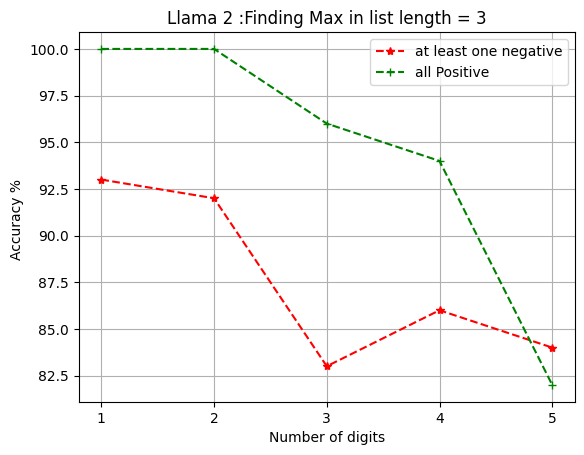

In [19]:
plt.plot(list(accuracy_neg.keys()), list(accuracy_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.plot(list(accuracy_pos.keys()), list(accuracy_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Accuracy % ")
plt.legend()
plt.grid()
plt.title("Llama 2 :Finding Max in list length = 3")
plt.show()

In [20]:
modify_file("max_output_5_neg.txt")
modify_file("max_output_5_pos.txt")

In [21]:
#get true and predicted values
true_neg, predicted_neg = generate_true_predicted_max("max_output_5_neg_new.txt")
true_pos, predicted_pos = generate_true_predicted_max("max_output_5_pos_new.txt")

print(len(true_neg))
print(len(predicted_neg))
print(len(true_pos))
print(len(predicted_pos))

500
500
500
500


In [22]:
#acuracy
print("Accuracy of max for list length 5")
accuracy_neg, total_neg = digit_accuracy(true_neg, predicted_neg)
accuracy_pos, total_pos = digit_accuracy(true_pos, predicted_pos)

print(accuracy_neg)
print(total_neg)
print(accuracy_pos)
print(total_pos)

Accuracy of max for list length 5
{'1': 93.0, '2': 84.0, '3': 86.0, '4': 77.0, '5': 79.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}
{'1': 100.0, '2': 97.0, '3': 96.0, '4': 88.0, '5': 81.0}
{'1': 100, '2': 100, '3': 100, '4': 100, '5': 100}


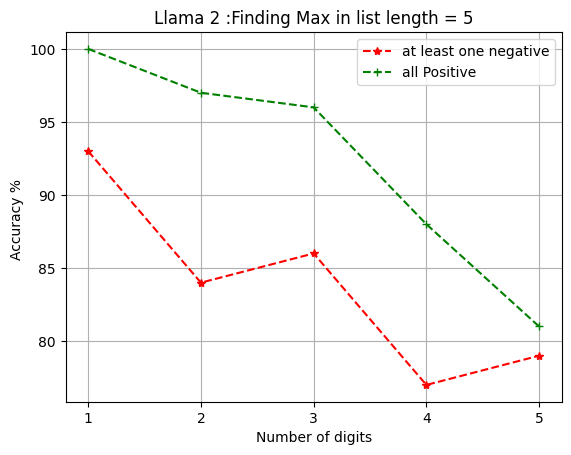

In [23]:
plt.plot(list(accuracy_neg.keys()), list(accuracy_neg.values()), label="at least one negative",color='r',marker='*',linestyle='--')
plt.plot(list(accuracy_pos.keys()), list(accuracy_pos.values()), label="all Positive",color='g',marker='+',linestyle='--')
plt.xlabel("Number of digits")
plt.ylabel("Accuracy % ")
plt.legend()
plt.grid()
plt.title("Llama 2 :Finding Max in list length = 5")

plt.show()